In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_diabetes = pd.read_csv('~/diabetes_binary.csv')

In [5]:
df_babies = pd.read_csv('~/babies.csv')
df_babies.drop('Unnamed: 0', axis = 1, inplace = True)
df_babies = df_babies.dropna() 

In [4]:
# You need to install tensorflow and import modules from Keras package

from tensorflow.keras.models import Sequential # To place Neural Network layers
from tensorflow.keras.layers import Dense # For fully connected layers

In [6]:
# Usual splitting of X and y and train-test set

X = df_babies.drop('bwt', axis = 1)
y = df_babies['bwt']

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25) 

In [30]:
# define the keras model
reg_model = Sequential()
reg_model.add(Dense(12, input_shape=(X.shape[1],), activation='relu')) # Here we define input layer, with number of variables, and first hidden layer of 12
reg_model.add(Dense(8, activation='relu'))


# compile the Keras model

reg_model.compile(loss= "mean_absolute_error" , optimizer="adam", metrics=["mean_absolute_error"])

In [ ]:
reg_model.fit(train_X, train_y, epochs=50, batch_size = 50)

In [33]:
reg_predictions = reg_model.predict(test_X)

10/10 [==============================] - 0s 3ms/step


2023-04-14 13:36:15.807664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [34]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(reg_predictions[:,0], test_y)

364.7343916082058

In [35]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(reg_predictions[:,0], test_y))

461.52553906962277

In [ ]:
# now classification

In [37]:
X = df_diabetes.drop('Diabetes_binary', axis = 1)
y = df_diabetes['Diabetes_binary']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.10)

In [43]:
# define the keras model
clf_model = Sequential()
clf_model.add(Dense(12, input_shape=(train_X.shape[1],), activation='relu'))
clf_model.add(Dense(8, activation='relu'))
clf_model.add(Dense(1, activation='sigmoid'))
# compile the keras model
clf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
clf_model.fit(X, y, epochs=50, batch_size=1000)


Epoch 1/50
 1/71 [..............................] - ETA: 23s - loss: 1.3167 - accuracy: 0.4800

2023-04-14 13:54:00.820463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 10ms/step - loss: 0.7923 - accuracy: 0.5871
Epoch 2/50
71/71 [==============================] - 1s 8ms/step - loss: 0.6346 - accuracy: 0.6499
Epoch 3/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5990 - accuracy: 0.6813
Epoch 4/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5790 - accuracy: 0.6978
Epoch 5/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5649 - accuracy: 0.7105
Epoch 6/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5543 - accuracy: 0.7201
Epoch 7/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5466 - accuracy: 0.7266
Epoch 8/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5411 - accuracy: 0.7312
Epoch 9/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5371 - accuracy: 0.7330
Epoch 10/50
71/71 [==============================] - 1s 8ms/step - loss: 0.5340 - accuracy: 0.7355
Epoch 11/50
71/71 [==========

2023-04-14 13:54:30.414143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2210/2210 [==============================] - 12s 5ms/step - loss: 0.5091 - accuracy: 0.7500
Accuracy: 75.00


In [47]:
clf_predictions = clf_model.predict(test_X)

442/442 [==============================] - 1s 2ms/step


In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, clf_predictions) # it was 0.8174 with logistic regression

0.8286162961958563

In [ ]:
import shap


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 500, criterion = 'log_loss', max_depth = 10).fit(train_X, train_y)

In [61]:
rf_predictions = rf_model.predict_proba(test_X)[:,1] # I obtain predictions and select the second column, probability of diabetes

In [62]:
roc_auc_score(test_y, rf_predictions)

0.8316008646958126

In [81]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(test_X)

In [ ]:
# try with less data points -> test_X.iloc[0:500,:]

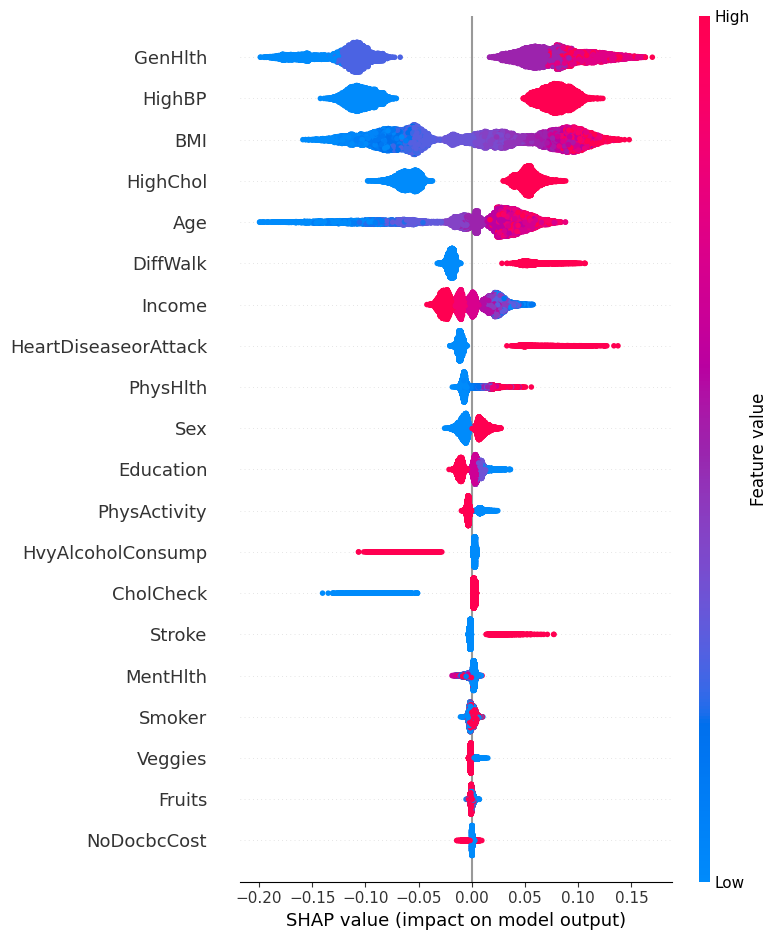

In [82]:
shap.summary_plot(shap_values[1], test_X)

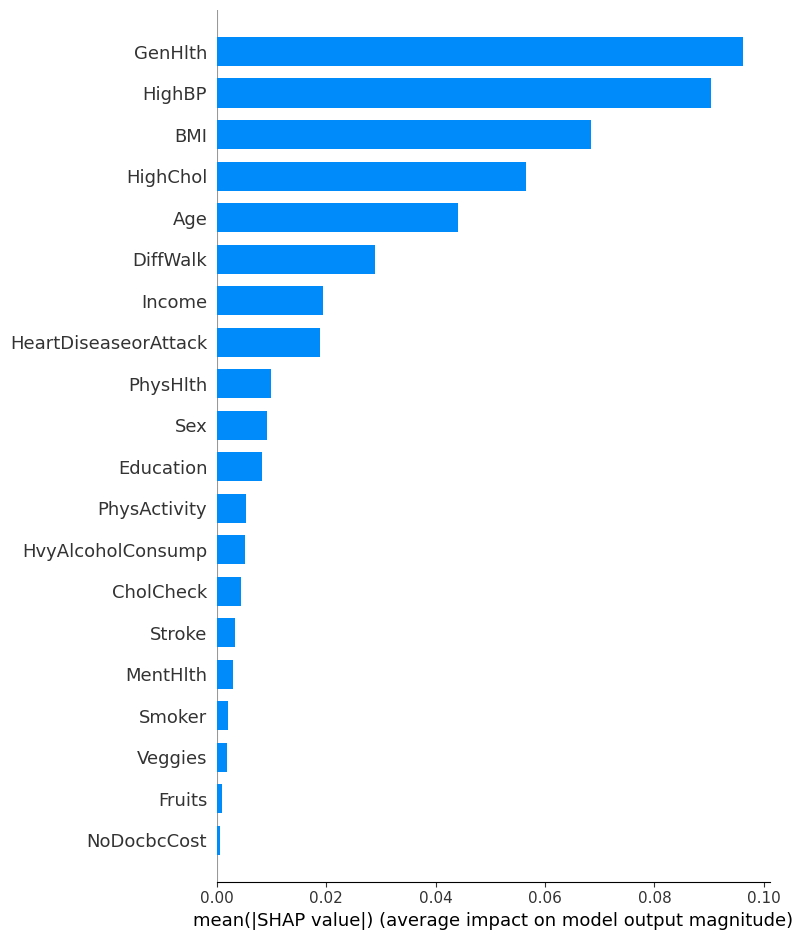

In [83]:
shap.summary_plot(shap_values[1], X, plot_type="bar")

In [87]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][345], test_X.iloc[345,])

In [89]:
shap.force_plot(explainer.expected_value[1], shap_values[1][5], test_X.iloc[5,])

In [90]:
shap.force_plot(explainer.expected_value[1], shap_values[1][111], test_X.iloc[111,])

In [91]:
#let's see with regression

X = df_babies.drop('bwt', axis = 1)
y = df_babies['bwt']

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25) 

from sklearn.ensemble import RandomForestRegressor

rf_model2 = RandomForestRegressor(n_estimators = 500, max_depth = 10).fit(train_X, train_y)
rf_predictions2 = rf_model2.predict(test_X)

In [95]:
explainer2 = shap.TreeExplainer(rf_model2)
shap_values2 = explainer2.shap_values(test_X)

In [ ]:
explainer2.expected_value

In [97]:
shap.force_plot(explainer2.expected_value, shap_values2[35], test_X.iloc[35,])

In [98]:
shap.force_plot(explainer2.expected_value, shap_values2[44], test_X.iloc[44,])

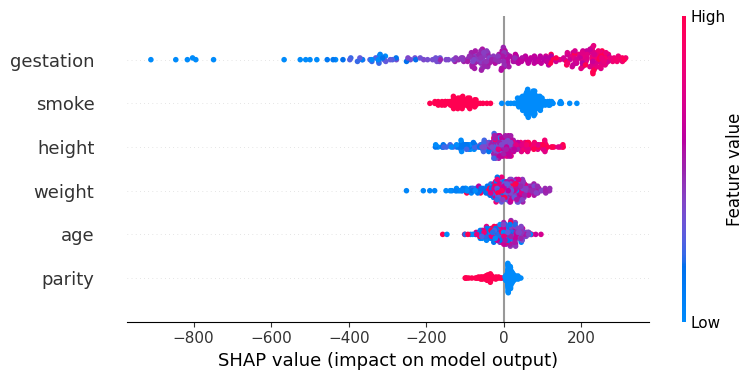

In [99]:
shap.summary_plot(shap_values2, test_X)

In [104]:
X.columns

Index(['gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

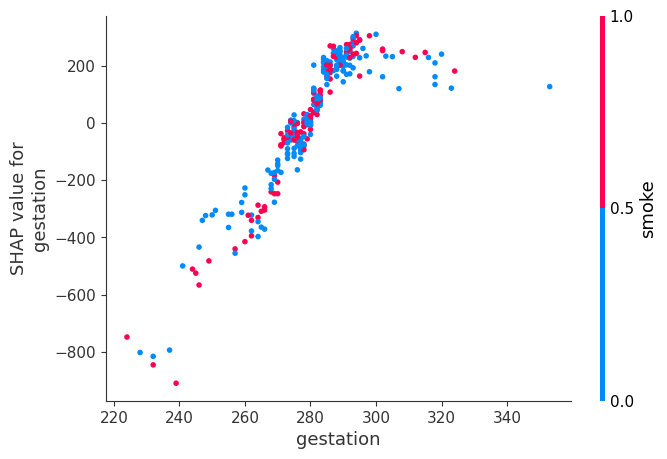

In [124]:
shap.dependence_plot('gestation', shap_values2, test_X, interaction_index="smoke")